In [3]:
from skimage.feature import blob, blob_dog, blob_doh, blob_log
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
datapath = os.path.join('f:\\', 'Data', 'aps 09', 'eric', 'czxfun', 'raw 2D', 'czx1-10_230-80-#2_90kev_2s_300f')

In [5]:
os.path.exists(datapath)

True

In [6]:
file0 = os.listdir(datapath)[-1]

In [7]:
file0

'czx1-10_230-80-#2_90kev_2s_300f.cor.299.cor'

In [19]:
arr = np.fromfile(os.path.join(datapath, file0), dtype=np.uint16).reshape(2048,2048)
subset = arr[800:1200, 800:1200]

<IPython.core.display.Javascript object>


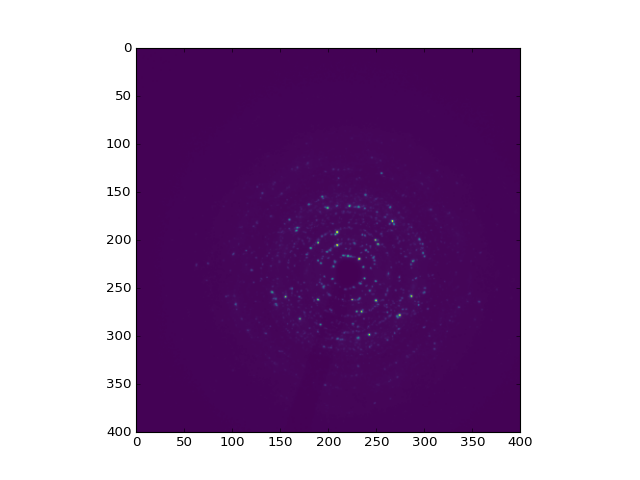

In [20]:
fig, ax = plt.subplots()
ax.imshow(subset, cmap='viridis')

In [35]:
f = tp.locate(subset, 5, minmass=2500)

In [24]:
tp.locate?

In [23]:
tp.annotate?

<IPython.core.display.Javascript object>


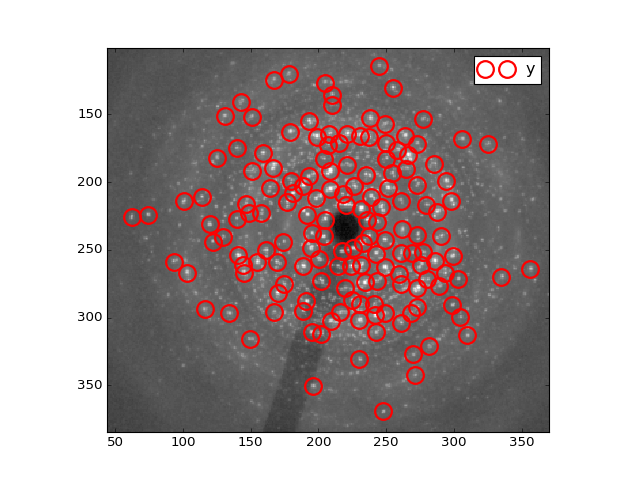

In [36]:
fig, ax = plt.subplots()
tp.annotate(f, np.log(subset))

In [160]:
img_part = arr[900:1150, 900:1150]
features = blob_dog(img_part, threshold=0.001, min_sigma=1, max_sigma=5, overlap=0.2)

In [161]:
features


array([[   0.   ,   77.   ,    1.6  ],
       [  13.   ,   37.   ,    2.56 ],
       [  14.   ,  145.   ,    1.6  ],
       ..., 
       [ 242.   ,  171.   ,    1.6  ],
       [ 249.   ,   98.   ,    2.56 ],
       [ 249.   ,  163.   ,    4.096]])

<IPython.core.display.Javascript object>


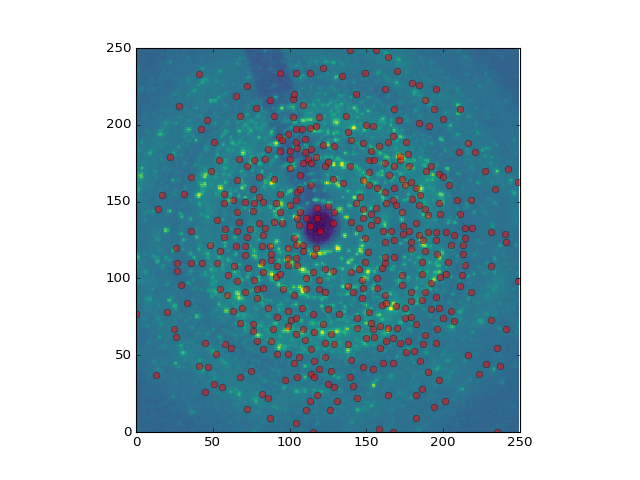

(0, 250)

In [162]:
fig, ax = plt.subplots()
ax.imshow(np.log(img_part), cmap='viridis', interpolation='None')
ax.plot(features[:, 0], features[:, 1], linestyle='None', marker='o', markerfacecolor=(1, 0, 0, 0.5))
ax.set_xlim(0, img_part.shape[0])
ax.set_ylim(0, img_part.shape[1])

In [81]:
import random

In [1]:
import trackpy as tp

In [128]:
features[:, :2].T

array([[  31.,   63.,   79.,  107.,  111.,  154.,  158.,  159.,  162.,
         167.,  167.,  178.,  182.,  187.,  188.,  198.,  202.,  203.],
       [ 155.,   79.,   59.,  124.,  193.,  199.,  186.,   48.,   89.,
           3.,  135.,  173.,   70.,  125.,   91.,  142.,  130.,  111.]])

In [89]:
for i in range(100):
    threshold = random.random() * 10
    min_sigma = random.randrange(0, 50) + 1
    max_sigma = random.randrange(min_sigma, 100)
    overlap = random.random()
    sigma_ratio = (random.random() + 1) * 3
    print(threshold, min_sigma, max_sigma, overlap, sigma_ratio)
    features = blob_dog(img_part, threshold=threshold, min_sigma=min_sigma, 
                        max_sigma=max_sigma, overlap=overlap, sigma_ratio=sigma_ratio)
    print(features.shape)
    

7.145528242694935 44 82 0.4954786135872483 5.969074208543847
(0,)
7.245207233793126 26 55 0.5993270142671678 4.421334201345459
(0,)
0.2815799856511103 21 50 0.04423730666481873 3.2036418363102244
(0,)
9.77807807694875 9 38 0.418687173918301 4.81436335260001
(0,)
4.862524575463411 40 89 0.0382321650513372 4.350077482956673
(0,)
6.4266076048434995 18 78 0.1848768082813288 5.394968205906912
(0,)
7.490579814266237 2 54 0.040180767068963674 3.430983364930977
(0,)
6.679455192326466 45 83 0.4214213742350128 5.481105575883384
(0,)
6.461315735391802 14 90 0.9961956439207242 4.680393064183111
(0,)
4.356067951336277 34 57 0.5195235311302343 3.6734470818049565
(0,)
1.9327894339358898 45 67 0.6807138858784061 5.071243438561701
(0,)
7.633593545994377 4 79 0.34650859400056355 4.690183467622754
(0,)
6.7883141366897135 12 24 0.7753236528899649 5.520946899924085
(0,)
9.50798347746865 7 37 0.09628948393619063 5.484332718696249
(0,)
0.2406323777713626 17 44 0.8738489771592575 4.574977927690624
(0,)
1.3379

In [78]:
blob_doh(img_part, log_scale=True)

array([], dtype=float64)

In [77]:
blob_log(img_part)

array([], dtype=float64)

In [83]:
from skimage import data